In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
from scipy import spatial
import pickle
import gensim
import os
from scipy import spatial
%matplotlib inline

//anaconda/lib/python2.7/site-packages/gensim/utils.py:1015: UserWarning: Pattern library is not installed, lemmatization won't be available.
  warnings.warn("Pattern library is not installed, lemmatization won't be available.")


In [2]:
model = gensim.models.Word2Vec.load_word2vec_format('./app1001/models/GoogleNews-vectors-negative300.bin', binary=True) 

In [3]:
def avg_feature_vector(words, model, num_features):
        #function to average all words vectors in a given paragraph
        featureVec = np.zeros((num_features,), dtype="float32")
        nwords = 0

        #list containing names of words in the vocabulary
        #index2word_set = set(model.index2word) this is moved as input param for performance reasons
        for word in words:
            try:
                featureVec = np.add(featureVec, model[word])
                nwords = nwords+1
            except:
                pass

        if(nwords>0):
            featureVec = np.divide(featureVec, nwords)
        return featureVec

In [7]:
model['tree']

array([ 0.484375  ,  0.12255859, -0.15722656,  0.03466797, -0.21972656,
       -0.23535156,  0.11328125,  0.02770996,  0.1328125 ,  0.28710938,
        0.10546875, -0.24121094,  0.01989746,  0.03320312, -0.06933594,
       -0.08203125, -0.25976562, -0.1875    , -0.00643921,  0.09033203,
        0.00759888, -0.07666016, -0.10498047, -0.125     ,  0.18945312,
       -0.12158203, -0.18457031,  0.04785156,  0.22070312, -0.2578125 ,
       -0.04760742, -0.21972656, -0.03027344, -0.13476562, -0.04541016,
       -0.28125   , -0.06640625, -0.37304688,  0.02709961,  0.02246094,
        0.15039062, -0.14648438,  0.14648438, -0.20800781,  0.12890625,
       -0.24023438, -0.29492188,  0.07958984,  0.0255127 ,  0.07177734,
       -0.04418945,  0.11572266,  0.09179688, -0.03759766,  0.27929688,
       -0.06347656,  0.02282715,  0.14746094, -0.02832031, -0.07714844,
        0.08203125, -0.13476562,  0.20996094,  0.08544922, -0.1640625 ,
       -0.11669922,  0.16699219, -0.09375   , -0.11132812, -0.00

In [4]:
# opera, ski, music, beach, whale, diving, driving, fishing, hiking, snorkeling, opera, concert, gourmet, mountaineer
# relaxed, meditation, regal
# heritage
# waterfall, war, murder, beautiful, casino, swim, ice, forest, beer, spelunking, Canada
#? Okay: California green red fountain
#? Not so good: America
# Use for live demo: ice, diving,  
# live demo: art, forest, diving, ice, 
#Old_Testament, relaxation, family vacation cruise, horseback riding, exotic adventure

In [5]:
# intellectual artistic, exotic adventure, peace and harmony, family cruise

In [120]:
test = return_img_url('forest')

In [138]:
test[1][2]

'Amazon Rain Forest \xc2\xa0\xc2\xa0[with Peru] Brazil'

In [139]:
test[1][2].decode('utf-8')

u'Amazon Rain Forest \xa0\xa0[with Peru] Brazil'

In [141]:
test[1][2].decode('utf-8').encode('ascii', 'ignore')

'Amazon Rain Forest [with Peru] Brazil'

In [119]:
def return_img_url(target):

    df = pd.read_csv('destinations_2.csv')
    df = df.drop('Unnamed: 0', axis=1)

    #--------- create vecs 1001x300
    vecs = np.zeros([df.shape[0], 300])
    vecs_sr = df['details'].apply(lambda x: avg_feature_vector(x.split(), model=model, num_features=300))

    vect = []
    for vec in vecs_sr:
        vect.extend(vec)
    vecs = np.array(vect).reshape([df.shape[0], 300])

    #---------- find closest vec in vecs to target: top_ix
    
    target_vec = avg_feature_vector(target.split(), model=model, num_features=300)

    target_to_vec_list = []
    for vec in vecs:
        target_to_vec = 1 - spatial.distance.cosine(target_vec ,vec)
        target_to_vec_list.append(target_to_vec)

    top_choices = sorted(zip(target_to_vec_list, range(len(target_to_vec_list))), key = lambda x:-x[0])
    top_ix  = [top_c[1] for top_c in top_choices]


    all_photo_list = []
    all_name_list = []
    # number of top locations
    top_num_to_choose = 3
    
    for rank_ix in range(top_num_to_choose):
        rank_name = df.loc[top_ix[rank_ix], 'location']
        rank_details = df.loc[top_ix[rank_ix], 'details']

        selection_list = []
        image_list = os.listdir('./app1001/app/static/Images_selected/')
        for im in image_list:
            if rank_name in im:
                selection_list.append(im)

        photo_total_num = len(selection_list)
        #photo_list = [('./app1001/app/static/Images_selected/' + selection).decode('utf-8') for selection in selection_list]
        #photo_list = [('./app1001/app/static/Images_selected/' + selection) for selection in selection_list]

        photo_list = [('Images_selected/' + selection) for selection in selection_list]
        
        if len(photo_list)>3:
            photo_list = photo_list[:3]
        
        all_photo_list.append(photo_list)
        all_name_list.append(rank_name)
    
    return all_photo_list, all_name_list

In [97]:
selection

'Lake Palace Hotel India7'

In [16]:
df.sample(5)

,details,location
532,Positano is a village and comune on the Amalfi...,Positano Italy
76,Salzburg (German pronunciation: [zaltsbk]; Bav...,Salzburg Old Town & Castle Austria
823,"Santiago de Compostela, commonly known as Sant...",Santiago de Compostela Spain
729,The Alfama (Portuguese pronunciation: [afm]) i...,Alfama Portugal
55,"The Pampas (from Quechua pampa, meaning ""plain...",Pampas & its Gauchos Argentina


In [102]:
selection

'Amazon Rain Forest \xc2\xa0\xc2\xa0[with Peru] Brazil8'

In [103]:
selection.decode('utf-8').encode('ascii', 'ignore')

'Amazon Rain Forest [with Peru] Brazil8'

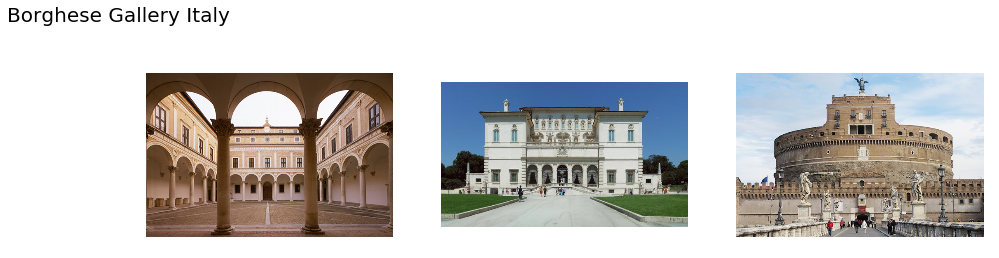

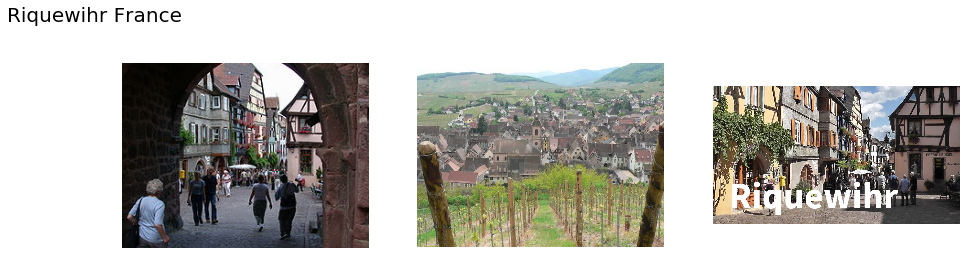

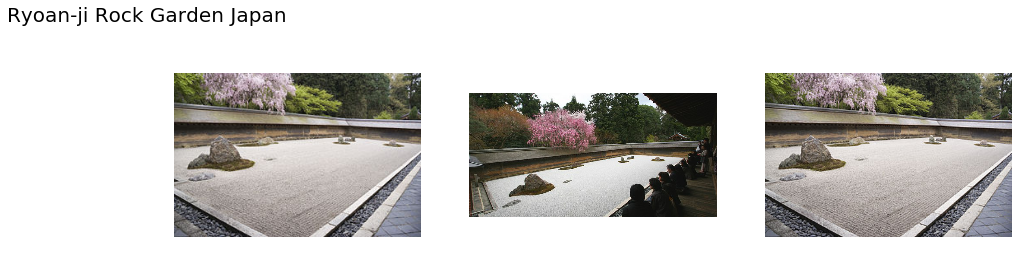

In [8]:
# backup

df = pd.read_csv('destinations_2.csv')
df = df.drop('Unnamed: 0', axis=1)

#--------- create vecs 1001x300
vecs = np.zeros([df.shape[0], 300])
vecs_sr = df['details'].apply(lambda x: avg_feature_vector(x.split(), model=model, num_features=300))

vect = []
for vec in vecs_sr:
    vect.extend(vec)
vecs = np.array(vect).reshape([df.shape[0], 300])

#---------- find closest vec in vecs to target: top_ix
target = 'classy'
target_vec = avg_feature_vector(target.split(), model=model, num_features=300)

target_to_vec_list = []
for vec in vecs:
    target_to_vec = 1 - spatial.distance.cosine(target_vec ,vec)
    target_to_vec_list.append(target_to_vec)

top_choices = sorted(zip(target_to_vec_list, range(len(target_to_vec_list))), key = lambda x:-x[0])
top_ix  = [top_c[1] for top_c in top_choices]


for rank_ix in range(3):
    rank_name = df.loc[top_ix[rank_ix], 'location']
    rank_details = df.loc[top_ix[rank_ix], 'details']

    selection_list = []
    image_list = os.listdir('./app1001/app/static/Images_selected/')
    for im in image_list:
        if rank_name in im:
            selection_list.append(im)

    photo_total_num = len(selection_list)
    photo_list = ['./app1001/app/static/Images_selected/' + selection for selection in selection_list]
    
    if len(photo_list) > 2:
        img0 = mpimg.imread(photo_list[0])
        img1 = mpimg.imread(photo_list[1])
        img2 = mpimg.imread(photo_list[2])
    elif len(photo_list) == 2:
        img0 = mpimg.imread(photo_list[0])
        img1 = mpimg.imread(photo_list[1])
        img2 = mpimg.imread(photo_list[1])
    else:
        img0 = mpimg.imread(photo_list[0])
        img1 = mpimg.imread(photo_list[0])
        img2 = mpimg.imread(photo_list[0])
    #print(rank_name)
    
    fig, ax = plt.subplots(1, 3, figsize = (15, 15))
    ax[0].imshow(img0);
    ax[0].axis('off');
    ax[1].imshow(img1);
    ax[1].axis('off');
    ax[2].imshow(img2);
    ax[2].axis('off');
    
    plt.suptitle(rank_name.decode('utf-8'), x = 0.1, y = 0.65, fontsize = 20)
    
    #print(rank_details)

In [18]:
location_name = df['location'].tolist()

In [19]:
location_name[top_ix[0]], target_to_vec_list[top_ix[0]]

('Borghese Gallery Italy', 0.28227402134728052)

In [20]:
location_name[top_ix[1000]], target_to_vec_list[top_ix[1000]]

('Lapland Ethnic Region Finland', -0.018267058954368753)

In [204]:
df['details'].apply(lambda x: len(x.split())).mean()

173.55544455544455

In [19]:
spatial.distance.cosine(target_vec ,vecs[top_ix[997]])

0.98581566151456967

In [150]:
rank_name

'Nuku Hiva French Polynesia'

In [116]:
from sklearn.cluster import KMeans
from scipy.spatial import cKDTree

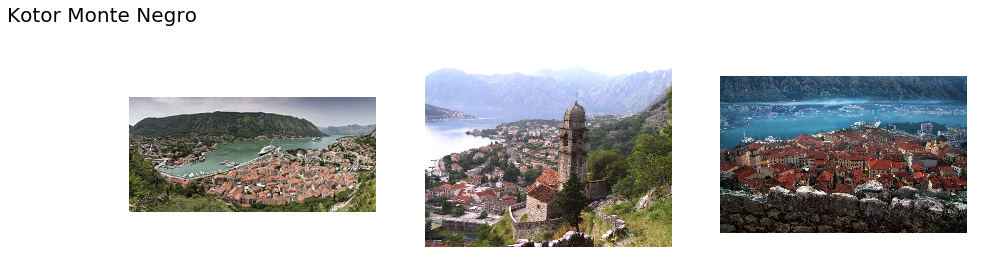

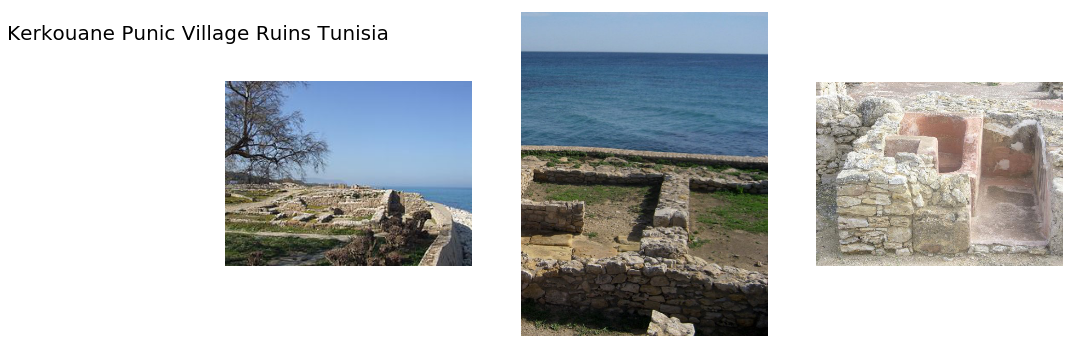

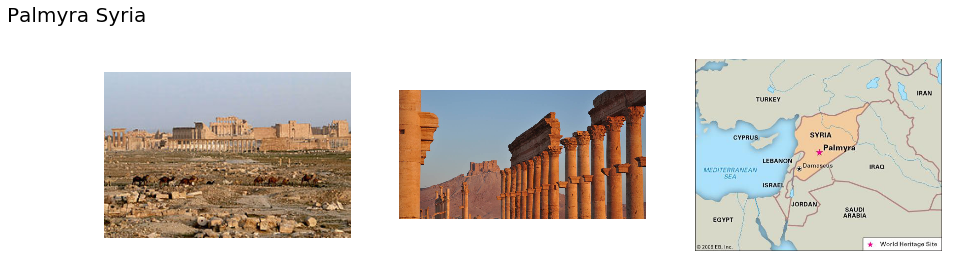

In [213]:
test_location = 651
num_neighbor = 3

tree = cKDTree(vecs)

cKD_dist, cKD_index = tree.query(np.array(vecs[test_location,:]), k=num_neighbor)

location_list = df['location'].tolist()

details_list = df['details'].tolist()

closest_list = [location_list[cKD_ix] for cKD_ix in cKD_index]

closest_list

ix = cKD_index

for ix0 in ix:
    rank_name = df.loc[ix0, 'location']
    rank_details = df.loc[ix0, 'details']

    selection_list = []
    image_list = os.listdir('./0_original_Images/')
    for im in image_list:
        if rank_name in im:
            selection_list.append(im)

    photo_total_num = len(selection_list)
    photo_list = ['./0_original_Images/' + selection for selection in selection_list]

    img0 = mpimg.imread(photo_list[0])
    img1 = mpimg.imread(photo_list[1])
    img2 = mpimg.imread(photo_list[2])

    #print(rank_name)
    
    fig, ax = plt.subplots(1, 3, figsize = (15, 15))
    ax[0].imshow(img0);
    ax[0].axis('off');
    ax[1].imshow(img1);
    ax[1].axis('off');
    ax[2].imshow(img2);
    ax[2].axis('off');
    
    plt.suptitle(rank_name.decode('utf-8'), x = 0.1, y = 0.65, fontsize = 20)
    
    #print(rank_details)